In [1]:
import pandas as pd 

In [2]:

        #Columns

# id - a unique identifier
# context - the text of the Hindi/Tamil sample from which answers should be derived
# question - the question, in Hindi/Tamil
# answer_text (train only) - the answer to the question (manual annotation) (note: for test, this is what you are attempting to predict)
# answer_start (train only) - the starting character in context for the answer (determined using substring match during data preparation)
# language - whether the text in question is in Tamil or Hindi


      #Colonnes
    
# id - un identifiant unique
# context - le texte de l'échantillon en hindi/tamil à partir duquel les réponses doivent être dérivées
# question - la question, en hindi/tamoul
# answer_text (train only) - la réponse à la question (annotation manuelle) (note : pour le test, c'est ce que vous essayez de prédire)
# answer_start (train only) - le caractère de départ dans le contexte de la réponse (déterminé en utilisant la correspondance des sous-chaînes pendant la préparation des données)
# language - si le texte en question est en tamoul ou en hindi.


#  Importation des bases de données

In [3]:
# Importation du jeu d'apprentissage
train=pd.read_csv("train.csv")
train.head()

,id,context,question,answer_text,answer_start,language
0,903deec17,ஒரு சாதாரண வளர்ந்த மனிதனுடைய எலும்புக்கூடு பின...,மனித உடலில் எத்தனை எலும்புகள் உள்ளன?,206,53,tamil
1,d9841668c,காளிதாசன் (தேவநாகரி: कालिदास) சமஸ்கிருத இலக்கி...,காளிதாசன் எங்கு பிறந்தார்?,காசுமீரில்,2358,tamil
2,29d154b56,சர் அலெக்ஸாண்டர் ஃபிளெமிங் (Sir Alexander Flem...,பென்சிலின் கண்டுபிடித்தவர் யார்?,சர் அலெக்ஸாண்டர் ஃபிளெமிங்,0,tamil
3,41660850a,"குழந்தையின் அழுகையை நிறுத்தவும், தூங்க வைக்கவ...",தமிழ்நாட்டில் குழந்தைகளை தூங்க வைக்க பாடும் பா...,தாலாட்டு,68,tamil
4,b29c82c22,சூரியக் குடும்பம் \nசூரியக் குடும்பம் (Solar S...,பூமியின் அருகில் உள்ள விண்மீன் எது?,சூரியனும்,585,tamil


In [4]:
print("shape of train data =>", train.shape)  # Number of lines and columns

shape of train data => (1114, 6)


In [5]:
# information gglobale sur la base train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1114 non-null   object
 1   context       1114 non-null   object
 2   question      1114 non-null   object
 3   answer_text   1114 non-null   object
 4   answer_start  1114 non-null   int64 
 5   language      1114 non-null   object
dtypes: int64(1), object(5)
memory usage: 52.3+ KB


In [6]:
# Importation de la base test

test=pd.read_csv("test.csv")
test.head()

,id,context,question,language
0,22bff3dec,"ज्वाला गुट्टा (जन्म: 7 सितंबर 1983; वर्धा, महा...",ज्वाला गुट्टा की माँ का नाम क्या है,hindi
1,282758170,गूगल मानचित्र (Google Maps) (पूर्व में गूगल लो...,गूगल मैप्स कब लॉन्च किया गया था?,hindi
2,d60987e0e,गुस्ताव रॉबर्ट किरचॉफ़ (१२ मार्च १८२४ - १७ अक्...,गुस्ताव किरचॉफ का जन्म कब हुआ था?,hindi
3,f99c770dc,அலுமினியம் (ஆங்கிலம்: அலுமினியம்; வட அமெரிக்க ...,அலுமினியத்தின் அணு எண் என்ன?,tamil
4,40dec1964,"கூட்டுறவு இயக்க வரலாறு, இங்கிலாந்து நாட்டில் ...",இந்தியாவில் பசுமை புரட்சியின் தந்தை என்று கருத...,tamil


In [7]:
# Nombre de colonnes et de lignes de la base test
print("shape of test data =>", test.shape)

shape of test data => (5, 4)


In [8]:
# information globale sur la base test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5 non-null      object
 1   context   5 non-null      object
 2   question  5 non-null      object
 3   language  5 non-null      object
dtypes: object(4)
memory usage: 288.0+ bytes


In [9]:
sample=pd.read_csv("sample_submission.csv")
sample

,id,PredictionString
0,22bff3dec,NaN
1,282758170,NaN
2,d60987e0e,NaN
3,f99c770dc,NaN
4,40dec1964,NaN


#  

### Travail sur le jeu d'apprentissage (train)

In [10]:
# les types des variables de la data frame

train.dtypes

id              object
context         object
question        object
answer_text     object
answer_start     int64
language        object
dtype: object

In [11]:
# Statistiques descriptives de la variable "answer_start"

train["answer_start"].describe()

count     1114.000000
mean      1709.403052
std       3730.169300
min          0.000000
25%         67.000000
50%        373.000000
75%       1387.750000
max      40991.000000
Name: answer_start, dtype: float64

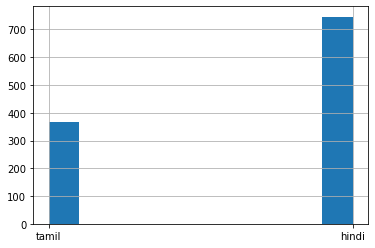

In [12]:
# Histogramme de la variable "language"

hist=train['language'].hist()

In [13]:
# Visualisation de la base avec la spécification de la langue "hindi"

train[train.language == 'hindi'].head()

,id,context,question,answer_text,answer_start,language
368,416091aeb,विषाणु अकोशिकीय अतिसूक्ष्म जीव हैं जो केवल जीव...,सन १८८६ में किसने बताया कि तम्बाकू में मोजेक र...,एडोल्फ मेयर,935,hindi
369,9d274ae3c,फ्लोरीन एक रासायनिक तत्व है। यह आवर्त सारणी (p...,फ्लोरीन की परमाणु संख्या क्या है?,9,166,hindi
370,da7397c5e,सीऐटल (अंग्रेजी: Seattle) अमेरिका के वाशिंगटन ...,सीटल शहर कहाँ स्थित है?,अमेरिका के वाशिंगटन राज्य,26,hindi
371,661880e43,सूर्य अथवा सूरज सौरमंडल के केन्द्र में स्थित ए...,पृथ्वी को सूर्य की परिक्रमा करने में कितने दिन...,28 दिनों,2762,hindi
372,3e3a2bed4,"दिल्ली नगर निगम एक शहर व नगर निगम है, जो दिल्ल...","दिल्ली नगर निगम, दिल्ली के कितने जिलों में कार...",कुल नौ जिलों,51,hindi


In [14]:
# Visualisation de la base avec la spécification de la langue "hindi"

train[train.language == "tamil"].head()

,id,context,question,answer_text,answer_start,language
0,903deec17,ஒரு சாதாரண வளர்ந்த மனிதனுடைய எலும்புக்கூடு பின...,மனித உடலில் எத்தனை எலும்புகள் உள்ளன?,206,53,tamil
1,d9841668c,காளிதாசன் (தேவநாகரி: कालिदास) சமஸ்கிருத இலக்கி...,காளிதாசன் எங்கு பிறந்தார்?,காசுமீரில்,2358,tamil
2,29d154b56,சர் அலெக்ஸாண்டர் ஃபிளெமிங் (Sir Alexander Flem...,பென்சிலின் கண்டுபிடித்தவர் யார்?,சர் அலெக்ஸாண்டர் ஃபிளெமிங்,0,tamil
3,41660850a,"குழந்தையின் அழுகையை நிறுத்தவும், தூங்க வைக்கவ...",தமிழ்நாட்டில் குழந்தைகளை தூங்க வைக்க பாடும் பா...,தாலாட்டு,68,tamil
4,b29c82c22,சூரியக் குடும்பம் \nசூரியக் குடும்பம் (Solar S...,பூமியின் அருகில் உள்ள விண்மீன் எது?,சூரியனும்,585,tamil


In [15]:
# Définition du context suivant les langues

tamil_context = train[train.language == 'tamil']['context'].str.cat(sep='\n')
hindi_context = train[train.language == 'hindi']['context'].str.cat(sep='\n')

In [16]:
# Affichage de la longueur des caractères suivant les langues

print(
    '\nlength of tamil characters : ', len(set(tamil_context)),
    '\nlength of hindi characters : ', len(set(hindi_context)),
    '\nlength of hindi & tamil characters : ', len(set(tamil_context) & set(hindi_context)),
    '\nlength of only tamil characters : ', len(set(tamil_context) - set(hindi_context)),
    '\nlength of only hindi characters : ', len(set(hindi_context) - set(tamil_context))
)


length of tamil characters :  636 
length of hindi characters :  816 
length of hindi & tamil characters :  371 
length of only tamil characters :  265 
length of only hindi characters :  445


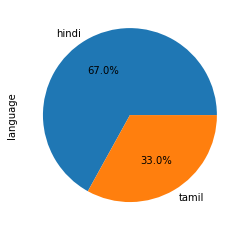

In [17]:
train["language"].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')

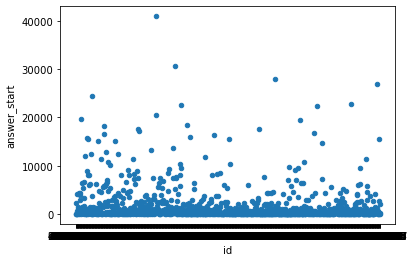

In [18]:
train.plot.scatter(x='id',y='answer_start') 